## Statistical Inference

### Sampling Distributions

With randomization, we typically only ever see one realization of all the possible set of assignments. From this, we get a single estimate of the average treatment effect. However, had the assignments been different, the estimate would have been different, too. If we were to repeatedly conduct the same experiment, the collection of average treatment effects would form a sampling distribution. The *sampling distribution* refers to the collection of estimates associated with every possible random assignment (Gerber and Green, 2012).

The mean of this sampling distribution&mdash;that is, the average estimated ATE across all possible random assignments&mdash;is equal to the true ATE (Gerber and Green, 2012). With a single experiment, however, we get a single, albeit unbiased, estimate of the ATE. This will almost certainly differ from the true ATE, but is unbiased in the sense that, on average, it yields the true ATE.

Let's look at a hypothetical sampling distribution.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.style.use('ggplot')
mpl.rc('savefig', dpi=100)

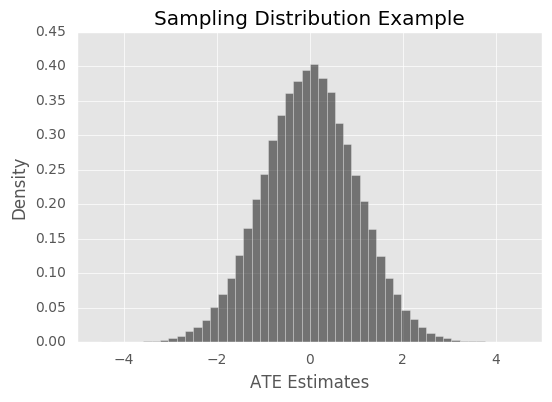

In [2]:
np.random.seed(42)

# data
mu, sigma = 0, 1
x = mu + sigma * np.random.randn(100000)

# plot
pd.Series(x).plot(kind='hist', bins=50,
                  color='#000000', alpha=0.5, normed=True)

# plot options
plt.title('Sampling Distribution Example')
plt.xlabel('ATE Estimates')
plt.ylabel('Density')
plt.tick_params(axis='both',
                top='off', bottom='off',
                left='off', right='off')

This distribution was generated using 100,000 random data points with zero mean ($\mu = 0$) and unit variance ($\sigma^2 = 1$). Thus, the true ATE is zero, meaning there is no treatment effect, and we see that the histogram is centered around that value. We can also see the variation around zero. We'll discuss this next.

### Standard Error

While experiments provide unbiased estimates of the ATE, they are not necessarily precise&mdash;there is variability around the true ATE. Sampling variability tells us about the uncertainty associated with our estimate. The statistic of choice for characterizing this variability is the standard error.

The standard error is the standard deviation of the sampling distribution. The formula for the population standard deviation is:

$$\sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \bar{x})^2 } \text{.}$$

In other words, we take the square root of the average squared deviations from the mean. (Note: when the data is a random sample from the population, the *sample* standard deviation divides the squared deviations by $N-1$ rather than $N$.)

For our hypothetical sampling distribution, we can calculate the standard deviation as follows.

In [3]:
(((x - x.mean()) ** 2).mean()) ** 0.5

1.0009009542948903

We could also use NumPy's built-in standard deviation method.

In [4]:
x.std()

1.0009009542948903

This can be expressed in terms of potential outcomes (Gerber and Green, 2012):

$$ SE(\widehat{ATE}) = \sqrt{ \frac{1}{N-1} \left( \frac{ m\sigma^2_{y_{0i}} }{ N-m } + \frac{ (N-m) \sigma^2_{y_{1i}} }{ m } + 2 cov(y_{0i}, y_{1i}) \right) }\text{,}$$

where $m$ is the number of units in the treatment group, $N$ is the total number of units (treatment and control), and $\sigma^2$ is the variance. The last term represents the covariance of $y_{0i}$ and $y_{1i}$ and measures the association between the potential outcomes.

Using this formulation, Gerber and Green discuss the ways that the experimental design can produce more precise estimates of the ATE. They do this by changing single inputs at a time while holding others fixed. These are summarized below.

1. A larger $N$ leads to a smaller standard error. This is true even if $m$ is held constant, which implies that only the control group increases. Similarly, increasing the number of units in the control group, $m$, also decreases the standard error.
2. The smaller that $\sigma^2_{y_{0i}}$ or $\sigma^2_{y_{1i}}$ are, the smaller the standard error. This implies that the treatment and control group units should be as similar as possible in terms of potential outcomes.
3. The smaller the covariance between $y_{0i}$ and $y_{1i}$, the smaller the standard error.

Gerber and Green provide an additional suggestion:

* if $\sigma^2_{y_{0i}}$ and $\sigma^2_{y_{1i}}$ are similar, about half of the units should be assigned to treatment and the rest to control
* if the variances of the potential outcomes are different, assign more units to the corresponding group
    * in practice, however, this variance is rarely known
    * thus, try to assign an equal number of units to each condition

Standard errors measure uncertainty, indicating how estimates vary across all possible random assignments (Gerber and Green, 2012). One goal of an experiment is to reduce variability. There are several ways to do this, which we'll discuss further in a subsequent chapter, but, in general, one can:

* make more precise measurements of the response
* transform response data
    * for example, instead of measuring only "post-test" responses, issue a "pre-test" and measure outcomes based difference between these values
* group observations so that they're as homogeneous as possible in terms of potential outcomes
* use more experimental units

### Estimating the Standard Error

$$ \widehat{SE} = \sqrt{ \frac{\widehat{ \sigma^2_{y_{0i}} }}{ N-m } + \frac{ \widehat{ \sigma^2_{y_{1i}} } }{ m } } $$

### Hypothesis Testing